In [1]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def merge_sort(A):
    if len(A) > 1:
        mid = len(A) // 2
        left_half = A[:mid]
        right_half = A[mid:]
        
        merge_sort(left_half)
        merge_sort(right_half)
        
        i = j = k = 0
        
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                A[k] = left_half[i]
                i += 1
            else:
                A[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            A[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            A[k] = right_half[j]
            j += 1
            k += 1

    return A


In [6]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key
    return A

In [3]:
def generate_best_case(size):
    return list(range(size))  

def generate_worst_case(size):
    return list(range(size, 0, -1))  

def generate_average_case(size):
    return random.sample(range(size), size)  

In [4]:
def measure_time(algorithm, A):
    start_time = time.time()
    algorithm(A)
    end_time = time.time()
    return end_time - start_time

In [5]:
sizes = [1000, 1500, 10000, 15000, 100000]

In [7]:
def run_tests():
    insertion_sort_times = {'best': [], 'worst': [], 'average': []}
    merge_sort_times = {'best': [], 'worst': [], 'average': []}

    for size in sizes:
        best_case = generate_best_case(size)
        worst_case = generate_worst_case(size)
        average_case = generate_average_case(size)
        
        insertion_sort_times['best'].append(measure_time(insertion_sort, best_case[:]))
        insertion_sort_times['worst'].append(measure_time(insertion_sort, worst_case[:]))
        insertion_sort_times['average'].append(measure_time(insertion_sort, average_case[:]))

        merge_sort_times['best'].append(measure_time(merge_sort, best_case[:]))
        merge_sort_times['worst'].append(measure_time(merge_sort, worst_case[:]))
        merge_sort_times['average'].append(measure_time(merge_sort, average_case[:]))
    
    return insertion_sort_times, merge_sort_times

In [8]:
insertion_sort_times, merge_sort_times = run_tests()

In [9]:
def plot_results(insertion_sort_times, merge_sort_times):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(sizes, insertion_sort_times['best'], label="Insertion Sort", marker='o')
    plt.plot(sizes, merge_sort_times['best'], label="Merge Sort", marker='x')
    plt.title("Melhor Caso")
    plt.xlabel("Tamanho da Entrada")
    plt.ylabel("Tempo (segundos)")
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(sizes, insertion_sort_times['worst'], label="Insertion Sort", marker='o')
    plt.plot(sizes, merge_sort_times['worst'], label="Merge Sort", marker='x')
    plt.title("Pior Caso")
    plt.xlabel("Tamanho da Entrada")
    plt.ylabel("Tempo (segundos)")
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(sizes, insertion_sort_times['average'], label="Insertion Sort", marker='o')
    plt.plot(sizes, merge_sort_times['average'], label="Merge Sort", marker='x')
    plt.title("Caso Médio")
    plt.xlabel("Tamanho da Entrada")
    plt.ylabel("Tempo (segundos)")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

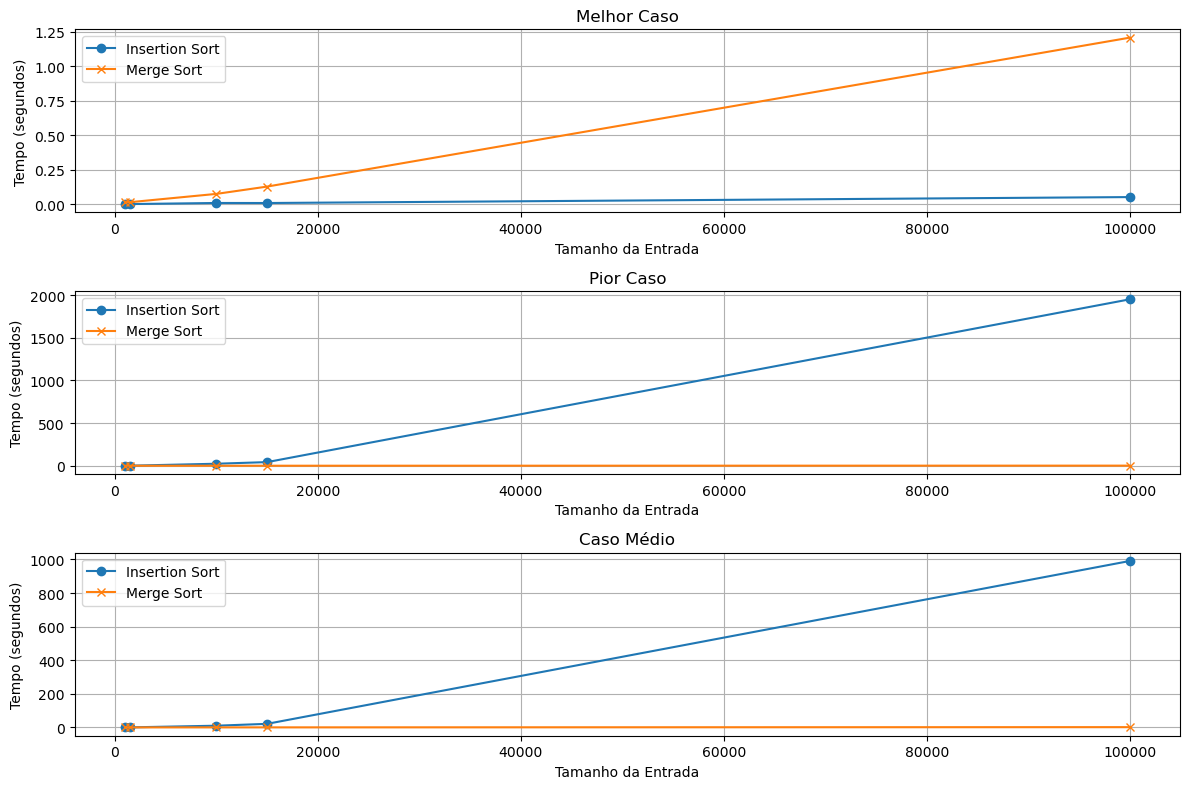

In [10]:
plot_results(insertion_sort_times, merge_sort_times)